In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv('data/bike_sharing_data/merged_data.csv')

In [3]:
data.head()

,Duration,Start date,End date,Start station number,Member type
0,552,2018-01-01 00:05:06,2018-01-01 00:14:18,31104,Member
1,1282,2018-01-01 00:14:30,2018-01-01 00:35:53,31321,Casual
2,1265,2018-01-01 00:14:53,2018-01-01 00:35:58,31321,Casual
3,578,2018-01-01 00:15:31,2018-01-01 00:25:09,31406,Casual
4,372,2018-01-01 00:18:02,2018-01-01 00:24:15,31618,Member


In [4]:
data.tail()

,Duration,Start date,End date,Start station number,Member type
7315966,139,2020-02-29 23:56:58,2020-02-29 23:59:17,31917,Member
7315967,388,2020-02-29 23:57:00,2020-03-01 00:03:29,31236,Member
7315968,373,2020-02-29 23:58:42,2020-03-01 00:04:56,31283,Member
7315969,597,2020-02-29 23:58:58,2020-03-01 00:08:55,31214,Member
7315970,983,2020-02-29 23:59:19,2020-03-01 00:15:43,31125,Casual


In [5]:
data.shape

(7315971, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315971 entries, 0 to 7315970
Data columns (total 5 columns):
Duration                int64
Start date              object
End date                object
Start station number    int64
Member type             object
dtypes: int64(2), object(3)
memory usage: 279.1+ MB


In [7]:
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Member type'],
      dtype='object')

In [8]:
data['Start station number'].nunique()

583

In [9]:
count=pd.DataFrame(data['Start station number'].value_counts().nlargest(10))

In [10]:
count=count.reset_index()

In [11]:
count.columns

Index(['index', 'Start station number'], dtype='object')

In [12]:
count.columns=['Start station number','Total_trip']

In [13]:
count.head(10)

,Start station number,Total_trip
0,31623,129514
1,31258,91893
2,31201,79125
3,31247,78248
4,31288,77084
5,31289,76998
6,31248,72472
7,31200,71113
8,31229,71002
9,31124,68855


In [14]:
count_type=pd.DataFrame(data.groupby(['Start station number','Member type'])['Start station number'].count().rename('count_by_membership'))

In [15]:
count_type=count_type.reset_index()

In [16]:
count_type.head()

,Start station number,Member type,count_by_membership
0,0,Casual,34
1,0,Member,742
2,31000,Casual,1199
3,31000,Member,2951
4,31001,Casual,860


In [17]:
barWidth = 0.25

In [18]:
cleaned_data=count

In [19]:
casual=count_type[count_type['Member type']=='Casual']

In [20]:
member=count_type[count_type['Member type']=='Member']

In [21]:
cleaned_data.head()

,Start station number,Total_trip
0,31623,129514
1,31258,91893
2,31201,79125
3,31247,78248
4,31288,77084


In [22]:
casual.head()

,Start station number,Member type,count_by_membership
0,0,Casual,34
2,31000,Casual,1199
4,31001,Casual,860
6,31002,Casual,2228
8,31003,Casual,1712


In [23]:
member.head()

,Start station number,Member type,count_by_membership
1,0,Member,742
3,31000,Member,2951
5,31001,Member,3749
7,31002,Member,10043
9,31003,Member,7793


In [24]:
d=count.merge(casual, on='Start station number', how='inner', indicator=True)

In [25]:
d.columns

Index(['Start station number', 'Total_trip', 'Member type',
       'count_by_membership', '_merge'],
      dtype='object')

In [26]:
d=d[['Start station number','Total_trip','count_by_membership']]

In [27]:
d=d.merge(member, on='Start station number', how='inner', indicator=True)

In [28]:
d.columns

Index(['Start station number', 'Total_trip', 'count_by_membership_x',
       'Member type', 'count_by_membership_y', '_merge'],
      dtype='object')

In [29]:
d=d[['Start station number', 'Total_trip', 'count_by_membership_x','count_by_membership_y']]

In [30]:
d

,Start station number,Total_trip,count_by_membership_x,count_by_membership_y
0,31623,129514,9984,119530
1,31258,91893,55346,36547
2,31201,79125,5193,73932
3,31247,78248,45344,32904
4,31288,77084,42947,34137
5,31289,76998,45399,31599
6,31248,72472,40945,31527
7,31200,71113,9843,61270
8,31229,71002,3424,67578
9,31124,68855,3808,65047


In [31]:
pos = list(range(len(d))) 
width = 0.25 

In [33]:
labels=d['Start station number']

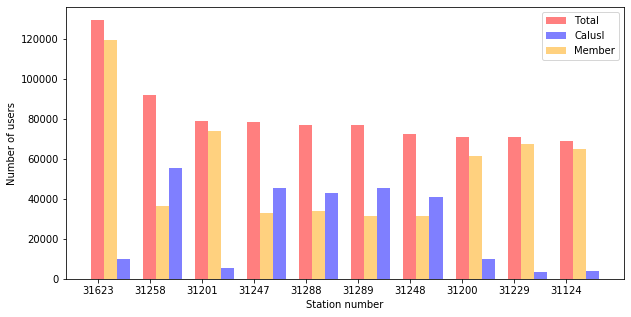

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        d['Total_trip'], 
        width, 
        alpha=0.5, 
        color='red', 
        label='Total') 

plt.bar([p + width*2 for p in pos], 
        d['count_by_membership_x'], 
        width, 
        alpha=0.5, 
        color='blue',
        label='Calusl')

plt.bar([p + width for p in pos], 
        d['count_by_membership_y'],
        width, 
        alpha=0.5, 
        color='orange',
        label="Member")

plt.xticks(range(len(labels)), labels)
plt.legend()
plt.xlabel('Station number')
plt.ylabel("Number of users")
plt.show()

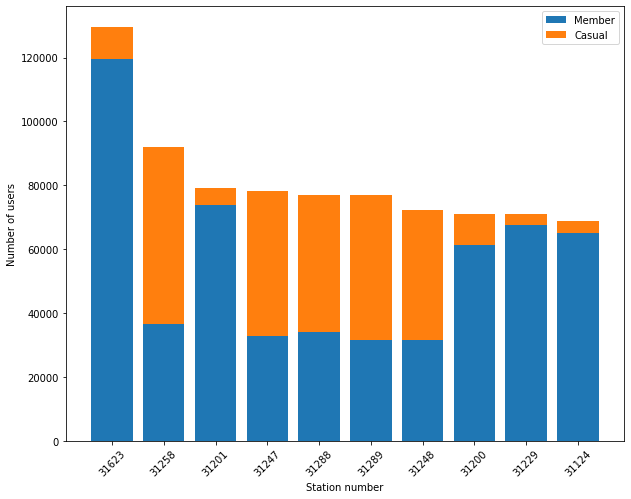

<Figure size 432x288 with 0 Axes>

In [39]:
data1 = d['count_by_membership_x']
data2 = d['count_by_membership_y']
fig, ax = plt.subplots(figsize=(10,8))
plt.xticks(rotation=45)
plt.bar(range(len(data2)), data2,label="Member")
plt.bar(range(len(data1)), data1, bottom=data2,label="Casual")
plt.legend()
plt.xticks(range(len(labels)), labels)
plt.xlabel('Station number')
plt.ylabel("Number of users")
plt.show()
plt.savefig('output.png')